# Discente: **Jean Carlos de Carvalho Costa**
---

Neste estudo, utilizamos o modelo de **Naive Bayes Gaussiano** para classificar indivíduos com base no consumo de:
- 🍿 Pipoca (gramas)
- 🥤 Refrigerante (ml)
- 🍬 Doces (gramas)

A classificação será feita para determinar se um indivíduo **"Ama Troll 2"** ou **"Não Ama Troll 2"**.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# **Definição das distribuições de probabilidade**
## Criamos um dicionário contendo as médias e desvios padrão das três features (pipoca, refrigerante e doces)
## para os dois grupos: "Loves Troll 2" e "Does not Love Troll 2".


In [89]:
# Médias e desvios padrão (substitua pelos valores reais dos slides)
features = {
    "Loves Troll 2": {
        "Popcorn (grams)": (24, 4),
        "Soda Pop (ml)": (600, 217),
        "Candy (grams)": (90, 50)
    },
    "Does not Love Troll 2": {
        "Popcorn (grams)": (4, 2),
        "Soda Pop (ml)": (120, 217),
        "Candy (grams)": (110, 20)
    }
}

# Gerando dados sintéticos
### Para simular um conjunto de dados realista, geramos 8 amostras aleatórias para cada grupo usando uma distribuição normal (Gaussiana).


In [90]:
# Gerando amostras aleatórias para cada feature
np.random.seed(42)
data = []
for group, feats in features.items():
    for _ in range(8):  # 8 amostras por grupo
        row = [group]
        for feature, (mean, std) in feats.items():
            row.append(np.random.normal(mean, std))
        data.append(row)

# Criando DataFrame
df = pd.DataFrame(data, columns=["Group", "Popcorn (grams)", "Soda Pop (ml)", "Candy (grams)"])
df

,Group,Popcorn (grams),Soda Pop (ml),Candy (grams)
0,Loves Troll 2,25.986857,569.996647,122.384427
1,Loves Troll 2,30.092119,549.188718,78.293152
2,Loves Troll 2,30.316851,766.533336,66.526281
3,Loves Troll 2,26.170240,499.438361,66.713512
4,Loves Troll 2,24.967849,184.818187,3.754108
5,Loves Troll 2,21.750850,380.215647,105.712367
6,Loves Troll 2,20.367904,293.530097,163.282438
7,Loves Troll 2,23.096895,614.653620,18.762591
8,Does not Love Troll 2,2.911235,144.070202,86.980128
9,Does not Love Troll 2,4.751396,-10.338596,104.166125


# Plotando as distribuições das três variáveis
### Criamos gráficos para visualizar como os dados estão distribuídos.

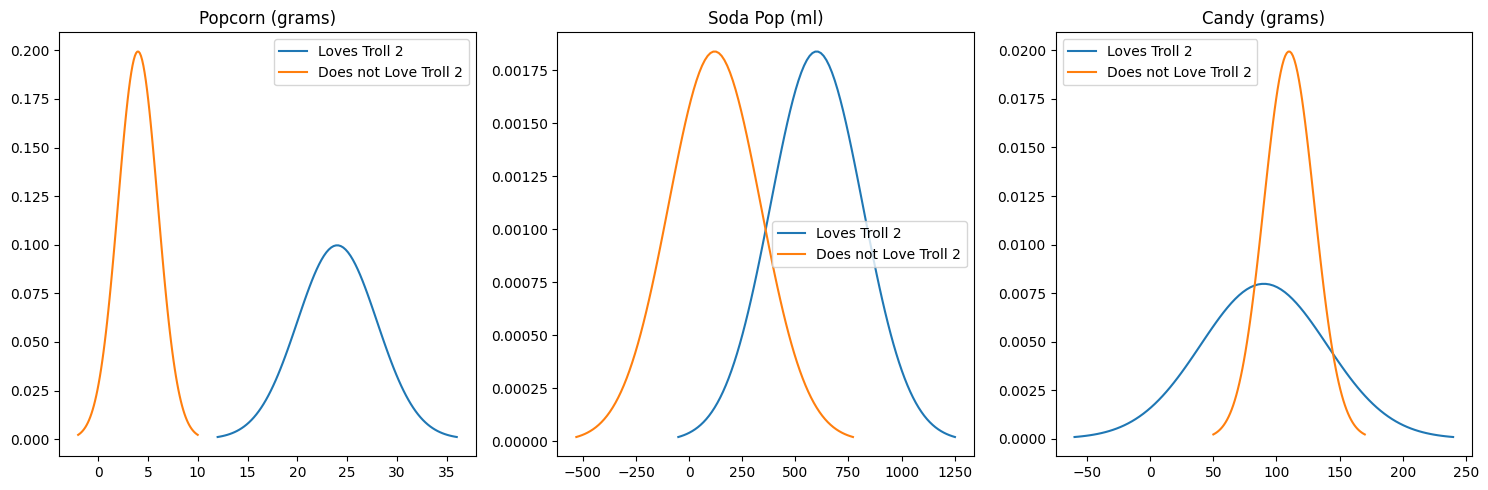

In [91]:
# Plotando as distribuições
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(["Popcorn (grams)", "Soda Pop (ml)", "Candy (grams)"]):
    for group in features.keys():
        mean, std = features[group][feature]
        x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
        y = norm.pdf(x, mean, std)
        axes[i].plot(x, y, label=group)
    axes[i].set_title(feature)
    axes[i].legend()
plt.tight_layout()
plt.show()

# Criando a função de verossimilhança
### Essa função calcula a probabilidade de um dado pertencer a uma distribuição normal específica.

In [12]:
# Função de cálculo de likelihood para um exemplo
def gaussian_likelihood(x, mean, std):
    return norm.pdf(x, mean, std)

# Implementação do classificador usando Naive Bayes Gaussiano
### Essa função recebe os valores de pipoca, refrigerante e doces, calcula a verossimilhança para cada grupo e retorna a classificação baseada na maior probabilidade.

In [13]:
# Função de classificação
def classify_example(popcorn, soda, candy):
    example = {"Popcorn (grams)": popcorn, "Soda Pop (ml)": soda, "Candy (grams)": candy}
    
    likelihoods = {group: 1 for group in features.keys()}
    for group, feats in features.items():
        for feature, (mean, std) in feats.items():
            likelihoods[group] *= gaussian_likelihood(example[feature], mean, std)
    
    # Normalizando os likelihoods
    total = sum(likelihoods.values())
    probabilities = {group: likelihood / total for group, likelihood in likelihoods.items()}
    
    # Retornando a classificação final
    classification = max(probabilities, key=probabilities.get)
    return classification, probabilities

# Testando a função de classificação
### Vamos classificar um exemplo com valores específicos de pipoca, refrigerante e doces.

In [14]:
# Testando a função com um exemplo
popcorn, soda, candy = 10, 200, 80
classification, probabilities = classify_example(popcorn, soda, candy)
print(f"\nClassificação para Popcorn={popcorn}g, Soda={soda}ml, Candy={candy}g: {classification}")
print("Probabilidades:", probabilities)


Classificação para Popcorn=10g, Soda=200ml, Candy=80g: Does not Love Troll 2
Probabilidades: {'Loves Troll 2': np.float64(1.514038220808944e-06), 'Does not Love Troll 2': np.float64(0.9999984859617792)}
